In [55]:
import pandas as pd
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sb



In [70]:
df15 = pd.read_excel("socioeconomic/2015.xls")
df13 = pd.read_excel("socioeconomic/2013.xls")
df08 = pd.read_excel("socioeconomic/2008.xls")
df06 = pd.read_excel("socioeconomic/2006.xls")
df01 = pd.read_excel("socioeconomic/2001.xls")
df99 = pd.read_excel("socioeconomic/1999.xls")






In [71]:
df15 = df15.replace('..', np.nan)
df15 = df15.dropna(thresh=5) 
df15 = df15.round(2)

df13 = df13.replace('..', np.nan)
df13 = df13.dropna(thresh=5) 
df13 = df13.round(2)

df08 = df08.replace('..', np.nan)
df08 = df08.dropna(thresh=5) 
df08 = df08.round(2)

df06 = df06.replace('..', np.nan)
df06 = df06.dropna(thresh=5) 
df06 = df06.round(2)

df01 = df01.replace('..', np.nan)
df01 = df01.dropna(thresh=5) 
df01 = df01.round(2)

df99 = df99.replace('..', np.nan)
df99 = df99.dropna(thresh=5) 
df99 = df99.round(2)

In [86]:
df99.columns.values

array(['CITY', 'POPULATION', ' MEDIAN AGE', ' DEPENDENCY RATIO',
       '4 CHILDREN FAMILY', 'RATE OF MOTORIZATION ', 'AVERAGE INCOME ',
       ' ACADMIC RANK', ' SCHOOL RANK', 'UNDER MIN INCOME',
       'DOUBLE MIN INCOME PLUS', 'INCOME SUPPORTED'], dtype=object)

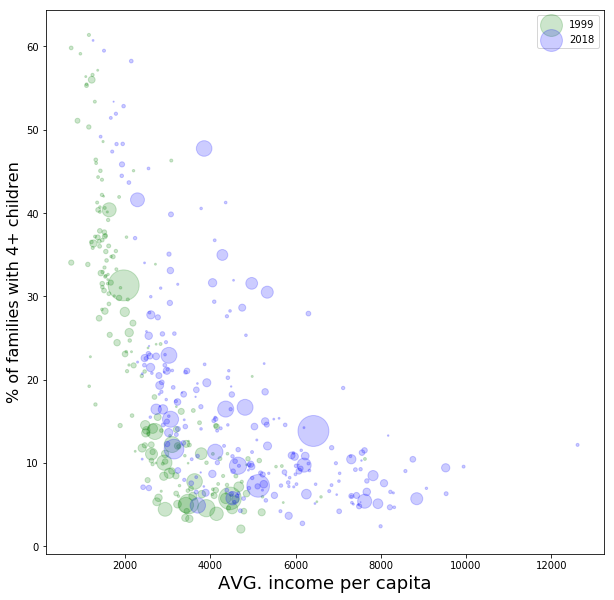

In [91]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
fig = plt.figure()
plt.xlabel('AVG. income per capita', fontsize=18)
plt.ylabel('% of families with 4+ children', fontsize=16)


# create data
x = df99['AVERAGE INCOME ']
y = df99['4 CHILDREN FAMILY']
z = df99['POPULATION']
 
# use the scatter function
plt.scatter(x, y, s=z/700, alpha=0.2,color='green')

# create data
x15 = df15['AVERAGE INCOME']
y15 = df15['4 CHILDREN FAMILY']
z15 = df15['POPULATION']
 
# use the scatter function
plt.scatter(x15, y15, s=z/700, alpha=0.2,color='blue',label='2015')

plt.legend(['1999','2018'],loc=1)

plt.show()

